In [ ]:
# Installing the required libraries
!pip install pandas
!pip install numpy
!pip install sqlalchemy
!pip install matplotlib
!pip install seaborn

In [ ]:
# Importing the installed libraries
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
# Database Connection Details

db_fashion = {
    'dbname': 'defaultdb',
    'user': 'avnadmin',
    'password': 'AVNS_i9D0FsVYPZo',
    'host': 'pg-3b9715ea-kirimidenn-c409.b.aivencloud.com',
    'port': ''
}

In [ ]:
# Creating the postgresql connection string
engine = create_engine(f"postgresql://{db_fashion['user']}:{db_fashion['password']}@{db_fashion['host']}:{db_fashion['port']}/{db_fashion['dbname']}")

In [ ]:
#SQL query
query = "SELECT * FROM luxweek11.fashion;"

In [ ]:
#Connecting the data into DataFrame
fashion= pd.read_sql(query, engine)

In [ ]:
#Viewing the first 5 records
fashion.head()

,clothing_type,category,price,discount,shop_outlet,delivery_date,order_date,revenue,customer_name,customer_email
0,men,accessories,113.84,6.15,Photobug,2022-06-20,2023-08-06,1102.01,Alfy Piborn,apiborn0@squarespace.com
1,men,accessories,60.62,49.47,Jetwire,2024-02-06,2022-01-01,5521.65,Demetra Stutely,dstutely1@wired.com
2,children,shirts,119.19,41.14,Edgewire,2022-06-03,2022-11-14,7252.86,Giselle Ruegg,gruegg2@weebly.com
3,men,shoes,43.19,12.50,Twitterbridge,2022-11-19,2024-08-01,4866.12,Sven Loughlin,sloughlin3@surveymonkey.com
4,women,accessories,116.46,28.74,Zoomlounge,2024-12-17,2024-01-29,2009.40,Cesya Boustead,cboustead4@nps.gov


In [ ]:
#Viewing the last 5 records
fashion.tail()

,clothing_type,category,price,discount,shop_outlet,delivery_date,order_date,revenue,customer_name,customer_email
95,children,shoes,108.38,5.82,Rhybox,2024-08-31,2023-01-01,5215.14,Vinni Rasch,vrasch2n@wunderground.com
96,men,shirts,188.96,17.87,Skimia,2023-11-23,2022-04-14,4898.09,Hazel Pinching,hpinching2o@si.edu
97,women,accessories,11.88,38.74,Kimia,2022-03-13,2023-06-15,3527.45,Rancell Cristofari,rcristofari2p@fda.gov
98,children,shoes,141.65,35.04,Flipbug,2022-03-13,2025-01-11,2663.98,Beulah Pawfoot,bpawfoot2q@amazon.de
99,women,shirts,169.94,10.59,Dynabox,2024-04-27,2022-07-15,7064.56,Cordelie Caitlin,ccaitlin2r@thetimes.co.uk


In [ ]:
#Data Shape
fashion.shape # 100 records and 10 fields

(100, 10)

In [18]:
# Wait, can we look for the columns we have in our data? Yesss
fashion.columns

Index(['clothing_type', 'category', 'price', 'discount', 'shop_outlet',
       'delivery_date', 'order_date', 'revenue', 'customer_name',
       'customer_email'],
      dtype='object')

In [12]:
#Checking that columns and datatypes
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   clothing_type   100 non-null    object 
 1   category        100 non-null    object 
 2   price           100 non-null    float64
 3   discount        100 non-null    float64
 4   shop_outlet     100 non-null    object 
 5   delivery_date   100 non-null    object 
 6   order_date      100 non-null    object 
 7   revenue         100 non-null    float64
 8   customer_name   100 non-null    object 
 9   customer_email  100 non-null    object 
dtypes: float64(3), object(7)
memory usage: 7.9+ KB


In [15]:
# Converting delivery_date and order_date from object to datatime

fashion['delivery_date']=pd.to_datetime(fashion['delivery_date'])
fashion['order_date']=pd.to_datetime(fashion['order_date'])

In [20]:
# Good,let's extract year, month and day from our datetime columns

fashion['delivery_year'] = fashion['delivery_date'].dt.year
fashion['delivery_month'] = fashion['delivery_date'].dt.month
fashion['delivery_day'] = fashion['delivery_date'].dt.day


In [21]:
# Also extract from the order_date column

fashion['order_year'] = fashion['order_date'].dt.year
fashion['order_month'] = fashion['order_date'].dt.month
fashion['order_day'] = fashion['order_date'].dt.day

In [23]:
fashion.head()

,clothing_type,category,price,discount,shop_outlet,delivery_date,order_date,revenue,customer_name,customer_email,delivery_year,delivery_month,delivery_day,order_year,order_month,order_day
0,men,accessories,113.84,6.15,Photobug,2022-06-20,2023-08-06,1102.01,Alfy Piborn,apiborn0@squarespace.com,2022,6,20,2023,8,6
1,men,accessories,60.62,49.47,Jetwire,2024-02-06,2022-01-01,5521.65,Demetra Stutely,dstutely1@wired.com,2024,2,6,2022,1,1
2,children,shirts,119.19,41.14,Edgewire,2022-06-03,2022-11-14,7252.86,Giselle Ruegg,gruegg2@weebly.com,2022,6,3,2022,11,14
3,men,shoes,43.19,12.50,Twitterbridge,2022-11-19,2024-08-01,4866.12,Sven Loughlin,sloughlin3@surveymonkey.com,2022,11,19,2024,8,1
4,women,accessories,116.46,28.74,Zoomlounge,2024-12-17,2024-01-29,2009.40,Cesya Boustead,cboustead4@nps.gov,2024,12,17,2024,1,29


In [22]:
#Now we're good with the column data-types
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   clothing_type   100 non-null    object        
 1   category        100 non-null    object        
 2   price           100 non-null    float64       
 3   discount        100 non-null    float64       
 4   shop_outlet     100 non-null    object        
 5   delivery_date   100 non-null    datetime64[ns]
 6   order_date      100 non-null    datetime64[ns]
 7   revenue         100 non-null    float64       
 8   customer_name   100 non-null    object        
 9   customer_email  100 non-null    object        
 10  delivery_year   100 non-null    int32         
 11  delivery_month  100 non-null    int32         
 12  delivery_day    100 non-null    int32         
 13  order_year      100 non-null    int32         
 14  order_month     100 non-null    int32         
 15  order_d

In [13]:
#Descriptive Statistics
fashion.describe()

,price,discount,revenue
count,100.000000,100.000000,100.000000
mean,107.285300,23.883300,5003.654300
std,52.978033,14.547669,2930.758006
min,11.880000,0.490000,249.270000
25%,62.015000,11.675000,2540.700000
50%,108.930000,22.705000,4882.105000
75%,146.847500,37.010000,7303.972500
max,199.740000,49.880000,9993.830000


In [ ]:
# Let's now check for missing values
fashion.isnull().sum() #No nulls, hurray!!

clothing_type     0
category          0
price             0
discount          0
shop_outlet       0
delivery_date     0
order_date        0
revenue           0
customer_name     0
customer_email    0
dtype: int64

In [ ]:
# Let's now start seeing some visuals

# Determine the monthly trend of total sales

revenueovermonth=fashion.groupby('order_month')['revenue'].sum()

<Axes: xlabel='order_month'>

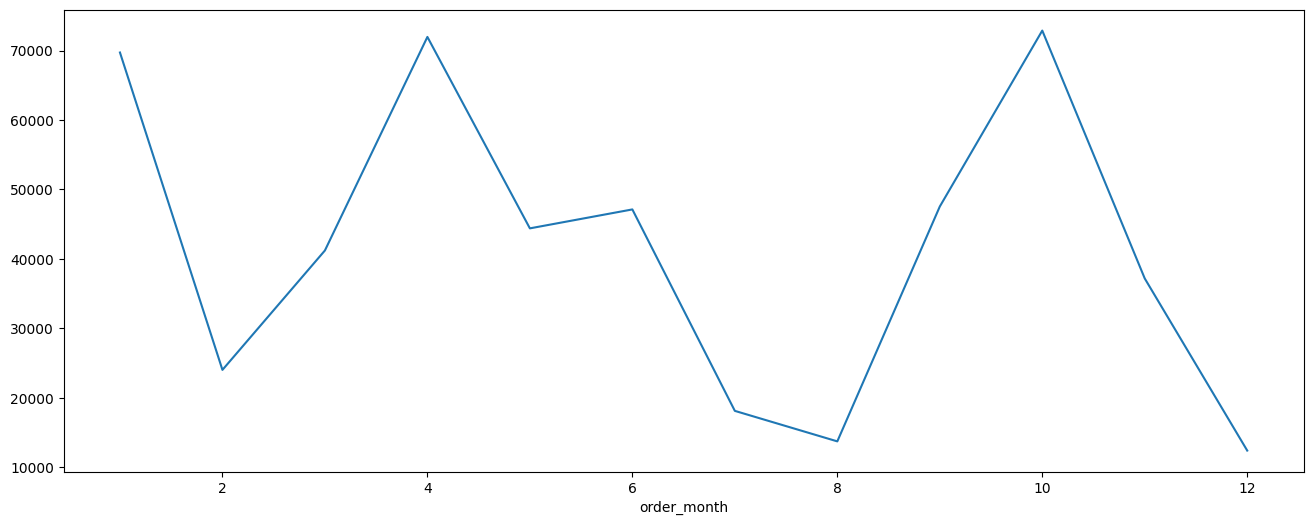

In [28]:
revenueovermonth.plot(kind='line', figsize=(16,6))

In [ ]:
# Analyze sales distribution by day of the week

# Extract the day of the week

fashion['order_weekday'] = fashion['order_date'].dt.day_name()


# Group revenue by day of the week
revenueoverweek=fashion.groupby('order_weekday')['revenue'].sum()


<Axes: xlabel='order_weekday'>

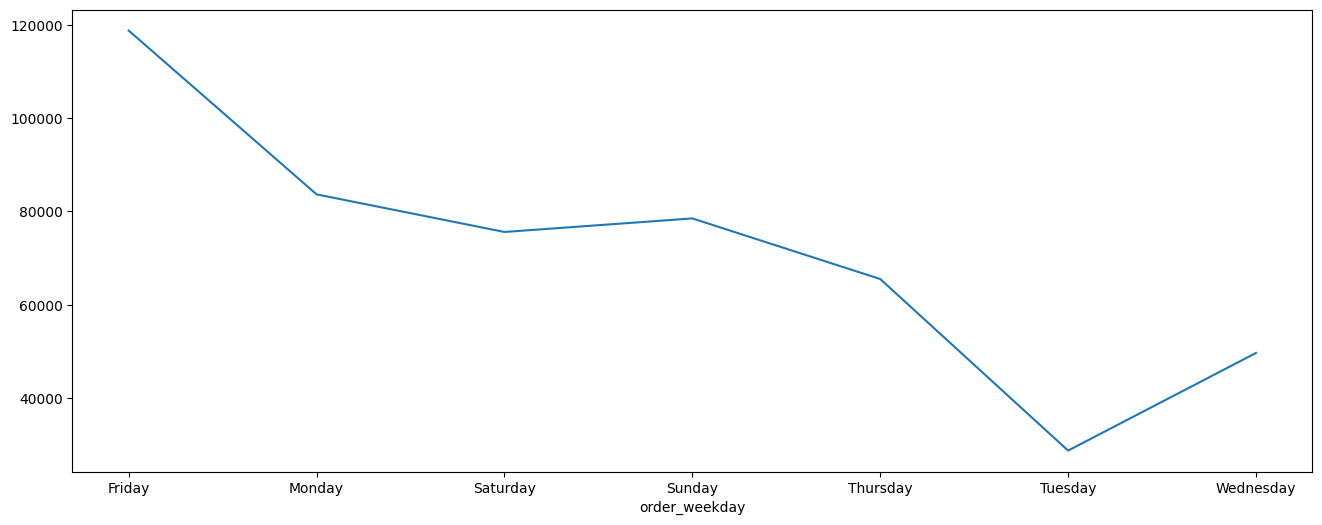

In [34]:
revenueoverweek.plot(kind='line', figsize=(16,6))